#  Prediction using Supervised learning model 


## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
type(data)

Data imported successfully


pandas.core.frame.DataFrame

## Printing the first ten rows

In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Statistical Overview

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the graph to visualize our dataset 

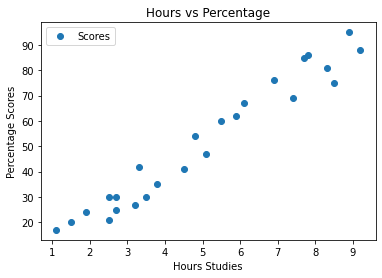

In [9]:
data.plot(x="Hours" , y="Scores", style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scores')
plt.show()

### from the above graph , we can see that there is a positive linear relation between the number of hours studied and percentage of scores

In [10]:
X=data.iloc[:, :-1].values
Y=data.iloc[:,1].values

## Shows that we have attributes and labels ,in the next step is to split this data into training and test sets. We will done this by using scikit-learns built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split
X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=0)

### Data is split into 80% training phase and 20% testing phase

## Training the dataset algorithm

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

print("Training complete")

Training complete


## We have split our data into training and testing sets, and now we have to train our algorithm.

### Plotting the regression line

In [14]:
line = regressor.coef_*X+regressor.intercept_

### Plotting for the test data

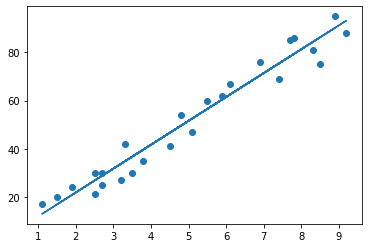

In [15]:
plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

## Making predictions
### We have trained our algorithm , it's time to make some predictions.

In [16]:
print(X_test)  #Testing data - In Hours
y_pred = regressor.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing the actual output values for X-test with predicted values

In [35]:
df = pd.DataFrame(y_pred,Y_test)

df

,0
20,16.884145
27,33.732261
69,75.357018
30,26.794801
62,60.491033


## Testing with our own data

In [40]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("Number of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of hours = 9.25
Predicted Score = 93.69173248737535


## Evaluating the model
### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset . For simplicity here, we have chosen the mean square error. There are many such matrices 

In [43]:
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test , y_pred))

Mean Absolute Error :  4.183859899002975


## Therefore if the person Studied for 9.25 hours per day then he/she may got the 93.69% of Scores 